In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import lmfit
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = 15, 8
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
markerlist = ["d", "x", "o"]


wsat_uni = 164.4
wsat_multi = 278


def unimodal(p,a,n,m):
    return wsat_uni *(1+(a*p)**n)**(-m)


def multimodal(x,l1,l2,l3,a1,a2,a3,m1,m2,m3,n1,n2,n3):
    f1 =  wsat_multi * l1 * (1+(a1*x)**n1)**(-m1)
    f2 =  wsat_multi * l2 * (1+(a2*x)**n2)**(-m2)
    f3 =  wsat_multi * l3 * (1+(a3*x)**n3)**(-m3)
    return f1 + f2 + f3

def plot_multimodal(l1,l2,l3,a1,a2,a3,m1,m2,m3,n1,n2,n3):
    x = np.linspace(3,9,100)
    y = multimodal(10**x,l1,l2,l3,a1,a2,a3,m1,m2,m3,n1,n2,n3)
    plt.plot(x,y, label="fit")
    i=0
    for group in grouped_multi:
        plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt=markerlist[i], label=group[0])
        i+=1
    plt.ylabel("Moisture Content [kg/m^3]")
    plt.xlabel("Capillary Pressure [log(Pa)]")
    plt.title("Mortar")
    plt.grid()
    plt.legend()
    
    
def plot_uni(a,n,m):
    x= np.linspace(3,9,100)
    y = unimodal(10**x,a,n,m)
    plt.plot(x,y, label="fit")
    i=0
    for group in grouped:
        plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt=markerlist[i], label=group[0])
        i+=1
    plt.ylabel("Moisture Content [kg/m^3]")
    plt.xlabel("Capillary Pressure [log(Pa)]")
    plt.title("Brick (unimodal)")
    plt.grid()
    plt.legend()

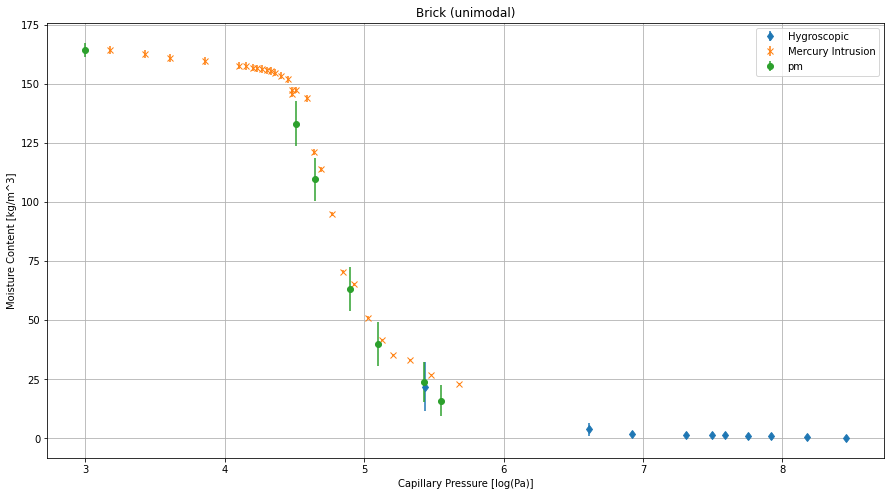

In [72]:
data_uni = pd.read_csv("raw_unimodal.csv")
data_multimodal = pd.read_csv("raw_multimodal.csv")
subset = data_uni[["log pc","w","sigma","regime"]]
grouped = subset.groupby("regime")
m=0
for group in grouped:
    plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt=markerlist[m], label=group[0])
    m+=1
plt.ylabel("Moisture Content [kg/m^3]")
plt.xlabel("Capillary Pressure [log(Pa)]")
plt.title("Brick (unimodal)")
plt.legend()
plt.grid()

In [76]:
interactive_plot = interactive(plot_uni, m=FloatSlider(min=0, max=1, value=0.2,continuous_update=False), n=FloatSlider(min=1, max=20, value=1,continuous_update=False),
                               a =FloatSlider(min=1e-6, max=1e-4,step=1e-8, readout_format=".5e",continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=1e-06, continuous_update=False, description='a', max=0.0001, min=1e-06…

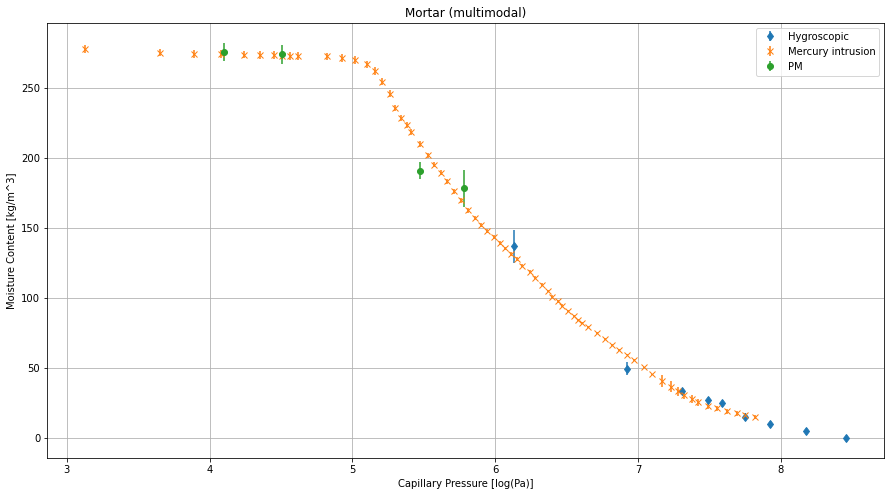

In [74]:
subset_multi = data_multimodal[["log pc","w","sigma","regime"]]
grouped_multi = subset_multi.groupby("regime")
m=0
for group in grouped_multi:
    plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt=markerlist[m], label=group[0])
    m+=1
plt.ylabel("Moisture Content [kg/m^3]")
plt.xlabel("Capillary Pressure [log(Pa)]")
plt.title("Mortar (multimodal)")
plt.grid()
plt.legend()

In [75]:
interactive_plot = interactive(plot_multimodal, 
                               l1 = FloatSlider(min=0, max=1, value=0.3,continuous_update=False),
                               l2 = FloatSlider(min=0, max=1, value=0.3,continuous_update=False),
                               l3 = FloatSlider(min=0, max=1, value=0.3,continuous_update=False),
                               m1=FloatSlider(min=0, max=1, value=0.2,continuous_update=False),
                               m2=FloatSlider(min=0, max=1, value=0.2,continuous_update=False), 
                               m3=FloatSlider(min=0, max=1, value=0.2,continuous_update=False),
                               n1=FloatSlider(min=1, max=20, value=1,continuous_update=False),
                               n2=FloatSlider(min=1, max=20, value=1,continuous_update=False),
                               n3=FloatSlider(min=1, max=20, value=1,continuous_update=False),
                               a1 =FloatSlider(min=1e-6, max=1e-4,step=1e-8, readout_format=".5e",continuous_update=False),
                               a2 =FloatSlider(min=1e-6, max=1e-4,step=1e-8, readout_format=".5e",continuous_update=False),
                               a3 =FloatSlider(min=1e-6, max=1e-4,step=1e-8, readout_format=".5e",continuous_update=False))

output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='l1', max=1.0), FloatSlider(…